In [2]:
%matplotlib inline


In [6]:
!pip install pyannote.metrics -q

## Diarization evaluation metrics


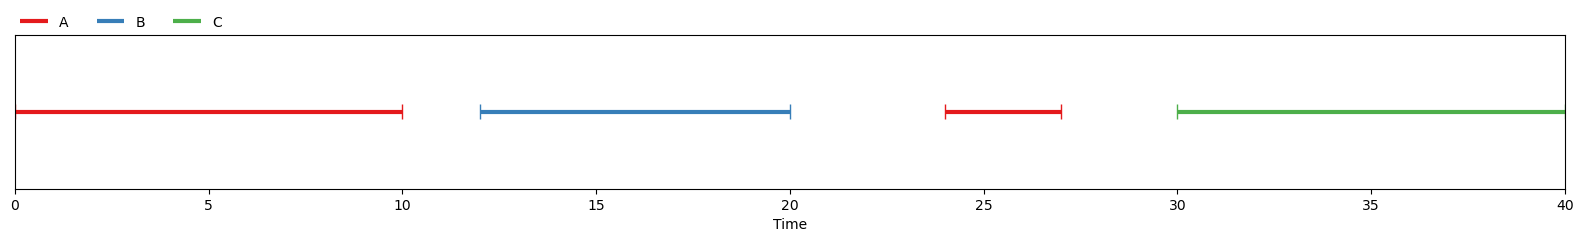

In [9]:
from pyannote.core import Annotation, Segment

reference = Annotation()
reference[Segment(0, 10)] = 'A'
reference[Segment(12, 20)] = 'B'
reference[Segment(24, 27)] = 'A'
reference[Segment(30, 40)] = 'C'
reference

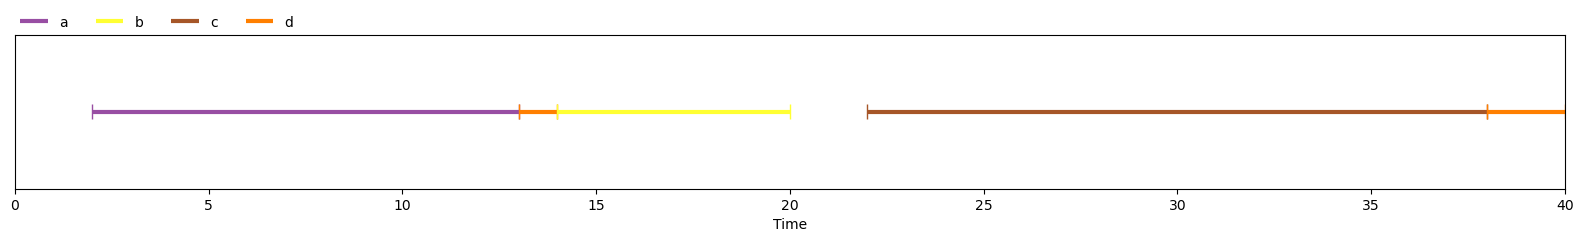

In [10]:
hypothesis = Annotation()
hypothesis[Segment(2, 13)] = 'a'
hypothesis[Segment(13, 14)] = 'd'
hypothesis[Segment(14, 20)] = 'b'
hypothesis[Segment(22, 38)] = 'c'
hypothesis[Segment(38, 40)] = 'd'
hypothesis

## Diarization error rate

In [34]:
from pyannote.metrics.diarization import DiarizationErrorRate
from pyannote.metrics.detection import DetectionAccuracy
from pyannote.metrics.detection import DetectionErrorRate

diarizationErrorRate = DiarizationErrorRate()
print("DER = {0:.3f}".format(diarizationErrorRate(reference, hypothesis, uem=Segment(0, 40))))


DER = 0.571


## Detection Accuracy

In [45]:
from pyannote.core import Annotation, Segment

reference = Annotation()
reference[Segment(0, 12)] = 'A'

hypothesis = Annotation()
hypothesis[Segment(0,10)] = 'a'


In [46]:
detectionAcc = DetectionAccuracy(skip_overlap=False)
detectionAcc.compute_components(reference, hypothesis)

{'true negative': 0.0,
 'true positive': 10.0,
 'false negative': 2.0,
 'false positive': 0.0}

In [47]:
detectionAcc = DetectionAccuracy(skip_overlap=False)
detectionAcc(reference, hypothesis)

0.8333333333333334

In [37]:
detectionErrorRate = DetectionErrorRate()
DetectionErrorRate.compute_components(reference = reference, hypothesis = hypothesis)

TypeError: compute_components() missing 1 required positional argument: 'self'

### Optimal mapping

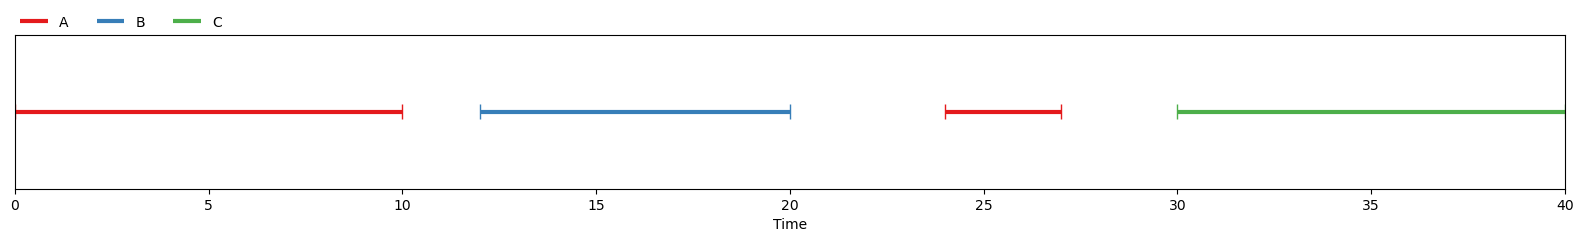

In [13]:
reference

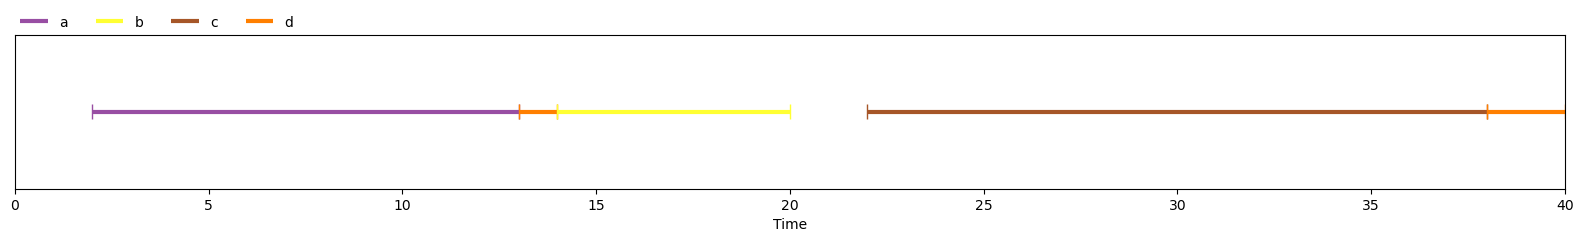

In [14]:
hypothesis

In [15]:
diarizationErrorRate.optimal_mapping(reference, hypothesis)


{'a': 'A', 'b': 'B', 'c': 'C'}

## Details

In [16]:
diarizationErrorRate(reference, hypothesis, detailed=True, uem=Segment(0, 40))

{'missed detection': 2.0,
 'total': 31.0,
 'correct': 22.0,
 'confusion': 7.0,
 'false alarm': 7.0,
 'diarization error rate': 0.5161290322580645}

## Clusters purity and coverage

In [17]:
from pyannote.metrics.diarization import DiarizationPurity
purity = DiarizationPurity()
print("Purity = {0:.3f}".format(purity(reference, hypothesis, uem=Segment(0, 40))))

Purity = 0.828


In [18]:
from pyannote.metrics.diarization import DiarizationCoverage
coverage = DiarizationCoverage()
print("Coverage = {0:.3f}".format(coverage(reference, hypothesis, uem=Segment(0, 40))))

Coverage = 0.759
